In [1]:
# Financial Forecasting Demo
# This notebook demonstrates the core functionality of the Financial Forecasting tool

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

/Users/anthonytiburcio/Documents/GitHub/financial-forecaster/venv311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# 1. Generate Synthetic Data
print("Generating synthetic financial data...")
dates = pd.date_range(start='2018-01-01', periods=200, freq='W')
trend = np.linspace(10000, 50000, len(dates))
seasonality = 5000 * np.sin(2 * np.pi * dates.dayofyear / 365.25)
noise = np.random.normal(0, 2000, size=len(dates))
values = trend + seasonality + noise

# Create DataFrame
df = pd.DataFrame({
    'ds': dates,
    'y': values
})

# 2. Display Sample Data
print("\nSample of the generated data:")
display(df.head())

Generating synthetic financial data...

Sample of the generated data:


,ds,y
0,2018-01-07,11594.059132
1,2018-01-14,11117.039299
2,2018-01-21,13464.610483
3,2018-01-28,15965.364401
4,2018-02-04,13167.523016



Visualizing the time series...


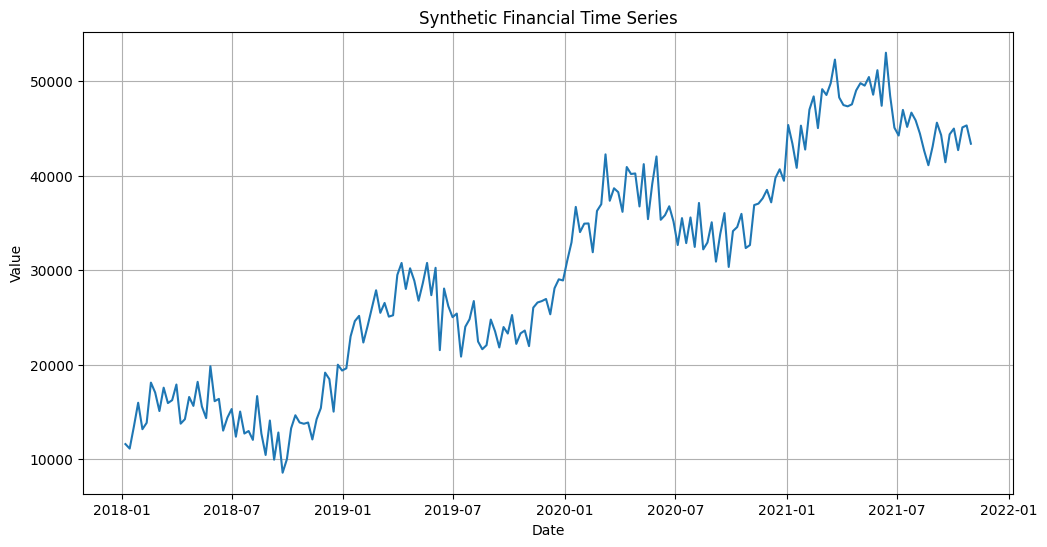

15:08:49 - cmdstanpy - INFO - Chain [1] start processing
15:08:49 - cmdstanpy - INFO - Chain [1] done processing



Training the Prophet model...
Generating forecasts...

Forecast results (first 5 rows):


,ds,yhat,yhat_lower,yhat_upper
0,2018-01-07,10946.982603,8678.780287,13224.229538
1,2018-01-14,12056.221053,9853.801611,14327.339833
2,2018-01-21,12854.152552,10717.216930,15237.121398
3,2018-01-28,13363.760244,11119.905004,15594.727347
4,2018-02-04,13661.990191,11439.704932,15932.907400



Plotting the forecast...


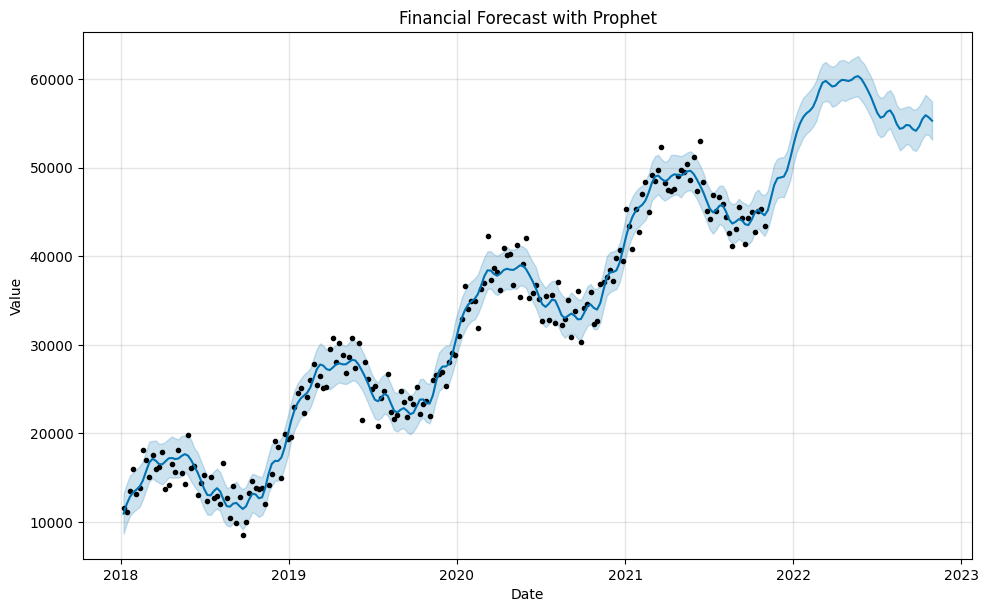


Plotting forecast components...


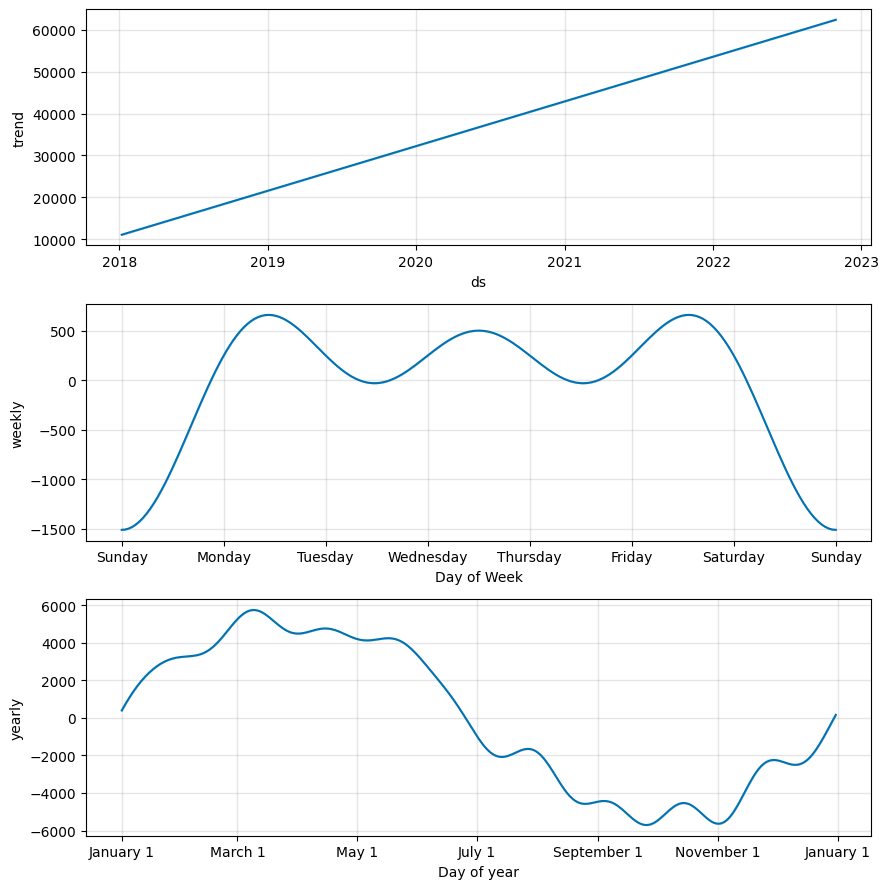


Creating interactive plot...


In [3]:
# 3. Visualize the Time Series
print("\nVisualizing the time series...")
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'])
plt.title('Synthetic Financial Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# 4. Train the Prophet Model
print("\nTraining the Prophet model...")
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive'
)
model.fit(df)

# 5. Create Future Dates for Forecasting
future = model.make_future_dataframe(periods=52, freq='W')  # Forecast 1 year ahead

# 6. Make Predictions
print("Generating forecasts...")
forecast = model.predict(future)

# 7. Display Forecast Results
print("\nForecast results (first 5 rows):")
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# 8. Plot the Forecast
print("\nPlotting the forecast...")
fig1 = model.plot(forecast)
plt.title('Financial Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# 9. Plot Components
print("\nPlotting forecast components...")
fig2 = model.plot_components(forecast)
plt.show()

# 10. Interactive Plot with Plotly
print("\nCreating interactive plot...")
fig = plot_plotly(model, forecast)
fig.update_layout(
    title='Interactive Financial Forecast',
    xaxis_title='Date',
    yaxis_title='Value',
    showlegend=True
)
fig.show()

15:08:50 - cmdstanpy - INFO - Chain [1] start processing
15:08:50 - cmdstanpy - INFO - Chain [1] done processing



Model Performance on Test Set:
Mean Absolute Error: $1,462.36
Mean Absolute Percentage Error: 3.14%


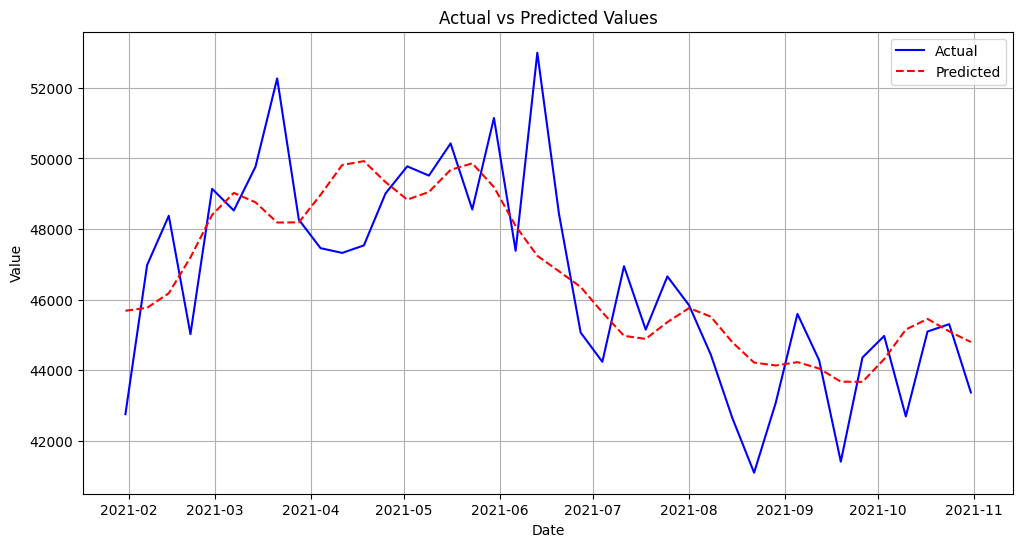


Demo complete! This shows the core forecasting functionality used in the Streamlit app.


In [4]:
# 11. Performance Metrics (if you have actual future values)
# For demonstration, we'll use the last 20% of our data as "future" data
train_size = int(0.8 * len(df))
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Train on the training set
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
model.fit(train)

# Create future dates for the test period
future = model.make_future_dataframe(periods=len(test), freq='W')
forecast = model.predict(future)

# Calculate error metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

y_true = test['y'].values
y_pred = forecast['yhat'].values[-len(test):]

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"\nModel Performance on Test Set:")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Mean Absolute Percentage Error: {mape*100:.2f}%")

# 12. Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], y_true, label='Actual', color='blue')
plt.plot(test['ds'], y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print("\nDemo complete! This shows the core forecasting functionality used in the Streamlit app.")